In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
target = "vote_average"
y = df[target]


columns_to_drop = [
    "homepage",
    "tagline",
    "overview",
    "status",
    "spoken_languages",
    "production_companies",
    "production_countries",
    "keywords",
    "title",
    "original_title",
    "id",
    "movie_id" if "movie_id" in df.columns else None,
]

columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop)

print("Remaining columns after Step 1:")
print(df.columns)


Remaining columns after Step 1:
Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'revenue', 'runtime', 'vote_average', 'vote_count'],
      dtype='object')


In [4]:
import numpy as np

df["budget"] = df["budget"].replace(0, np.nan)
df["revenue"] = df["revenue"].replace(0, np.nan)

df["runtime"] = df["runtime"].fillna(df["runtime"].median())

df["release_date"] = pd.to_datetime(df["release_date"], errors='coerce')

df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_day"] = df["release_date"].dt.day

df = df.dropna(subset=["release_year"])

print("Missing values after Step 2:")
print(df.isna().sum())


Missing values after Step 2:
budget               1036
genres                  0
original_language       0
popularity              0
release_date            0
revenue              1426
runtime                 0
vote_average            0
vote_count              0
release_year            0
release_month           0
release_day             0
dtype: int64


In [5]:
df["budget_missing"] = df["budget"].isna().astype(int)
df["budget"] = df["budget"].fillna(df["budget"].median())


In [6]:
import ast


def extract_genres(x):
    try:
        data = ast.literal_eval(x)
        return [d['name'] for d in data]
    except:
        return []


df['genre_list'] = df['genres'].apply(extract_genres)

df['genre_count'] = df['genre_list'].apply(len)

df['primary_genre'] = df['genre_list'].apply(lambda x: x[0] if len(x) > 0 else "Unknown")

df[['genres', 'genre_list', 'genre_count', 'primary_genre']].head()


,genres,genre_list,genre_count,primary_genre
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Fantasy, Science Fiction]",4,Action
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[Adventure, Fantasy, Action]",3,Adventure
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Crime]",3,Action
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[Action, Crime, Drama, Thriller]",4,Action
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Science Fiction]",3,Action


In [7]:
df = df.drop(columns=["genres"])

In [8]:

genre_dummies = pd.get_dummies(df["primary_genre"], prefix="genre")

df = pd.concat([df, genre_dummies], axis=1)

df = df.drop(columns=["primary_genre"])

df.head()


,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,release_month,...,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_Unknown,genre_War,genre_Western
0,237000000.0,en,150.437577,2009-12-10,2.787965e+09,162.0,7.2,11800,2009.0,12.0,...,False,False,False,False,False,False,False,False,False,False
1,300000000.0,en,139.082615,2007-05-19,9.610000e+08,169.0,6.9,4500,2007.0,5.0,...,False,False,False,False,False,False,False,False,False,False
2,245000000.0,en,107.376788,2015-10-26,8.806746e+08,148.0,6.3,4466,2015.0,10.0,...,False,False,False,False,False,False,False,False,False,False
3,250000000.0,en,112.312950,2012-07-16,1.084939e+09,165.0,7.6,9106,2012.0,7.0,...,False,False,False,False,False,False,False,False,False,False
4,260000000.0,en,43.926995,2012-03-07,2.841391e+08,132.0,6.1,2124,2012.0,3.0,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df['revenue'].describe()


,revenue
count,3.376000e+03
mean,1.170314e+08
std,1.834831e+08
min,5.000000e+00
25%,1.535290e+07
50%,5.175184e+07
75%,1.401651e+08
max,2.787965e+09


In [10]:
df['revenue'].nunique()


3296

In [11]:
df['revenue'].value_counts().head(10)


,count
revenue,
7000000.0,6
8000000.0,6
6000000.0,5
10000000.0,5
100000000.0,5
12000000.0,5
14000000.0,4
25000000.0,4
11000000.0,4


In [12]:
df.drop(columns=['revenue'], inplace=True)


In [13]:
df['main_genre'] = df['genre_list'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')

In [14]:
import numpy as np

df['log_budget'] = np.log1p(df['budget'])
df['log_popularity'] = np.log1p(df['popularity'])

In [15]:
df = pd.get_dummies(df,
                    columns=['original_language', 'main_genre'],
                    drop_first=True)


In [16]:
df.drop(columns=['budget', 'popularity'], inplace=True)

In [17]:
df.drop(columns=['release_date'], inplace=True)


In [18]:
df.drop(columns=['genre_list'], inplace=True)

X = df.drop(columns=['vote_average'])

X.select_dtypes(include='object').columns


Index([], dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

# Define X and y.
X = df.drop(columns=['vote_average'])
y = df['vote_average']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((3841, 86), (961, 86))

In [20]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['runtime', 'vote_count', 'release_year', 'release_month', 'release_day',
       'budget_missing', 'genre_count', 'log_budget', 'log_popularity'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [22]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

results = {}

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, lr_pred)),
    'R2 Score': r2_score(y_test, lr_pred)
}

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
results['Ridge Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, ridge_pred)),
    'R2 Score': r2_score(y_test, ridge_pred)
}

# 3. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
results['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
    'R2 Score': r2_score(y_test, rf_pred)
}

results


{'Linear Regression': {'RMSE': np.float64(0.9204008197638524),
  'R2 Score': 0.37402978768041384},
 'Ridge Regression': {'RMSE': np.float64(0.9177504166514729),
  'R2 Score': 0.3776297076593891},
 'Random Forest': {'RMSE': np.float64(0.7648876370385949),
  'R2 Score': 0.5676903236347977}}

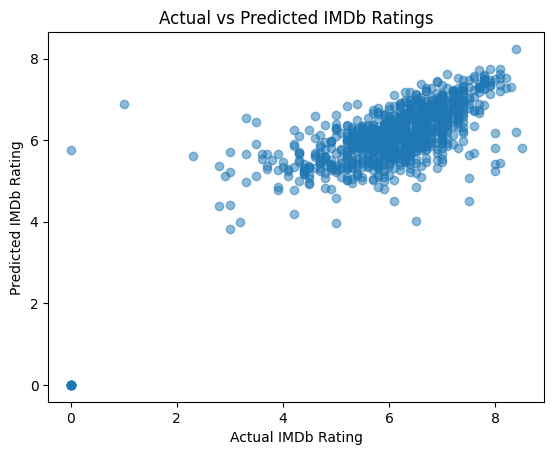

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual IMDb Rating")
plt.ylabel("Predicted IMDb Rating")
plt.title("Actual vs Predicted IMDb Ratings")
plt.show()


# The scatter plot shows a clear positive relationship between actual and predicted IMDb ratings, indicating that the model successfully captures the overall trend in the data. Predictions are most accurate for mid-range ratings (5–7), where data density is highest. Slight deviations at extreme rating values are expected due to data imbalance and limited explanatory features.

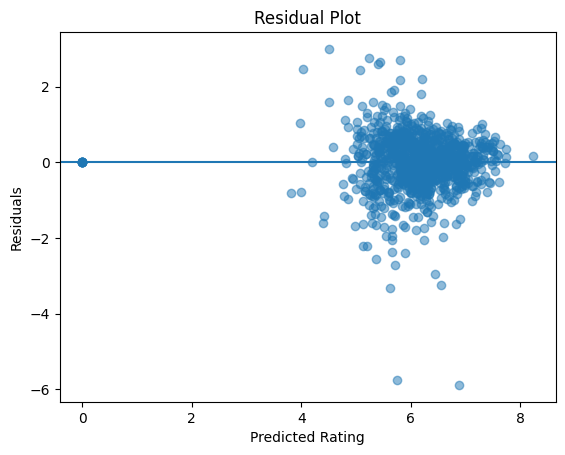

In [25]:
residuals = y_test - rf_pred

plt.scatter(rf_pred, residuals, alpha=0.5)
plt.axhline(0)
plt.xlabel("Predicted Rating")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# The residual plot displays a largely random distribution of errors centered around zero, suggesting that the model does not exhibit significant systematic bias. While residual variance increases slightly for extreme predicted values, this behavior is typical in real-world datasets and indicates that the model generalizes reasonably well.